In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Madrid 2013

In [185]:
a=pd.read_csv(r"C:\Users\user\Downloads\C10_air\madrid_2013.csv")
a

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2013-11-01 01:00:00,NaN,0.6,NaN,NaN,135.0,74.0,NaN,NaN,NaN,7.0,NaN,NaN,28079004
1,2013-11-01 01:00:00,1.5,0.5,1.3,NaN,71.0,83.0,2.0,23.0,16.0,12.0,NaN,8.3,28079008
2,2013-11-01 01:00:00,3.9,NaN,2.8,NaN,49.0,70.0,NaN,NaN,NaN,NaN,NaN,9.0,28079011
3,2013-11-01 01:00:00,NaN,0.5,NaN,NaN,82.0,87.0,3.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2013-11-01 01:00:00,NaN,NaN,NaN,NaN,242.0,111.0,2.0,NaN,NaN,12.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209875,2013-03-01 00:00:00,NaN,0.4,NaN,NaN,8.0,39.0,52.0,NaN,NaN,NaN,NaN,NaN,28079056
209876,2013-03-01 00:00:00,NaN,0.4,NaN,NaN,1.0,11.0,NaN,6.0,NaN,2.0,NaN,NaN,28079057
209877,2013-03-01 00:00:00,NaN,NaN,NaN,NaN,2.0,4.0,75.0,NaN,NaN,NaN,NaN,NaN,28079058
209878,2013-03-01 00:00:00,NaN,NaN,NaN,NaN,2.0,11.0,52.0,NaN,NaN,NaN,NaN,NaN,28079059


In [186]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209880 entries, 0 to 209879
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     209880 non-null  object 
 1   BEN      50462 non-null   float64
 2   CO       87018 non-null   float64
 3   EBE      50463 non-null   float64
 4   NMHC     25935 non-null   float64
 5   NO       209108 non-null  float64
 6   NO_2     209108 non-null  float64
 7   O_3      121858 non-null  float64
 8   PM10     104339 non-null  float64
 9   PM25     51980 non-null   float64
 10  SO_2     86970 non-null   float64
 11  TCH      25935 non-null   float64
 12  TOL      50317 non-null   float64
 13  station  209880 non-null  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 22.4+ MB


In [187]:
b=a.fillna(value=87)
b

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2013-11-01 01:00:00,87.0,0.6,87.0,87.0,135.0,74.0,87.0,87.0,87.0,7.0,87.0,87.0,28079004
1,2013-11-01 01:00:00,1.5,0.5,1.3,87.0,71.0,83.0,2.0,23.0,16.0,12.0,87.0,8.3,28079008
2,2013-11-01 01:00:00,3.9,87.0,2.8,87.0,49.0,70.0,87.0,87.0,87.0,87.0,87.0,9.0,28079011
3,2013-11-01 01:00:00,87.0,0.5,87.0,87.0,82.0,87.0,3.0,87.0,87.0,87.0,87.0,87.0,28079016
4,2013-11-01 01:00:00,87.0,87.0,87.0,87.0,242.0,111.0,2.0,87.0,87.0,12.0,87.0,87.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209875,2013-03-01 00:00:00,87.0,0.4,87.0,87.0,8.0,39.0,52.0,87.0,87.0,87.0,87.0,87.0,28079056
209876,2013-03-01 00:00:00,87.0,0.4,87.0,87.0,1.0,11.0,87.0,6.0,87.0,2.0,87.0,87.0,28079057
209877,2013-03-01 00:00:00,87.0,87.0,87.0,87.0,2.0,4.0,75.0,87.0,87.0,87.0,87.0,87.0,28079058
209878,2013-03-01 00:00:00,87.0,87.0,87.0,87.0,2.0,11.0,52.0,87.0,87.0,87.0,87.0,87.0,28079059


In [188]:
b.columns

Index(['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25',
       'SO_2', 'TCH', 'TOL', 'station'],
      dtype='object')

In [189]:
c=b.head(10)
c

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2013-11-01 01:00:00,87.0,0.6,87.0,87.00,135.0,74.0,87.0,87.0,87.0,7.0,87.00,87.0,28079004
1,2013-11-01 01:00:00,1.5,0.5,1.3,87.00,71.0,83.0,2.0,23.0,16.0,12.0,87.00,8.3,28079008
2,2013-11-01 01:00:00,3.9,87.0,2.8,87.00,49.0,70.0,87.0,87.0,87.0,87.0,87.00,9.0,28079011
3,2013-11-01 01:00:00,87.0,0.5,87.0,87.00,82.0,87.0,3.0,87.0,87.0,87.0,87.00,87.0,28079016
4,2013-11-01 01:00:00,87.0,87.0,87.0,87.00,242.0,111.0,2.0,87.0,87.0,12.0,87.00,87.0,28079017
5,2013-11-01 01:00:00,1.0,0.6,0.8,87.00,70.0,70.0,2.0,24.0,87.0,6.0,87.00,5.2,28079018
6,2013-11-01 01:00:00,87.0,0.4,87.0,0.29,51.0,80.0,5.0,23.0,14.0,4.0,1.44,87.0,28079024
7,2013-11-01 01:00:00,87.0,87.0,87.0,0.23,29.0,60.0,4.0,87.0,87.0,87.0,1.51,87.0,28079027
8,2013-11-01 01:00:00,87.0,1.0,87.0,87.00,165.0,107.0,2.0,87.0,87.0,11.0,87.00,87.0,28079035
9,2013-11-01 01:00:00,87.0,0.6,87.0,87.00,63.0,93.0,87.0,11.0,87.0,8.0,87.00,87.0,28079036


In [190]:
d=c[['BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25',
       'SO_2', 'TCH', 'TOL', 'station']]
d

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,87.0,0.6,87.0,87.00,135.0,74.0,87.0,87.0,87.0,7.0,87.00,87.0,28079004
1,1.5,0.5,1.3,87.00,71.0,83.0,2.0,23.0,16.0,12.0,87.00,8.3,28079008
2,3.9,87.0,2.8,87.00,49.0,70.0,87.0,87.0,87.0,87.0,87.00,9.0,28079011
3,87.0,0.5,87.0,87.00,82.0,87.0,3.0,87.0,87.0,87.0,87.00,87.0,28079016
4,87.0,87.0,87.0,87.00,242.0,111.0,2.0,87.0,87.0,12.0,87.00,87.0,28079017
5,1.0,0.6,0.8,87.00,70.0,70.0,2.0,24.0,87.0,6.0,87.00,5.2,28079018
6,87.0,0.4,87.0,0.29,51.0,80.0,5.0,23.0,14.0,4.0,1.44,87.0,28079024
7,87.0,87.0,87.0,0.23,29.0,60.0,4.0,87.0,87.0,87.0,1.51,87.0,28079027
8,87.0,1.0,87.0,87.00,165.0,107.0,2.0,87.0,87.0,11.0,87.00,87.0,28079035
9,87.0,0.6,87.0,87.00,63.0,93.0,87.0,11.0,87.0,8.0,87.00,87.0,28079036


In [192]:
x=d[['BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10']]
y=d['TCH']

In [193]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [194]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [195]:
print(lr.intercept_)

1.0441249799019587


In [196]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,-0.007612
CO,0.087592
EBE,0.002509
NMHC,0.965357
NO,0.072234
NO_2,-0.012029
O_3,-0.000238
PM10,-0.095456


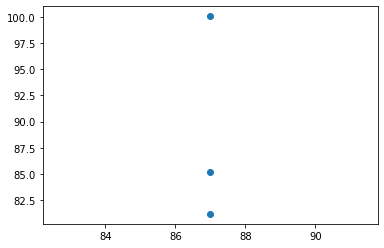

In [197]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [198]:
print(lr.score(x_test,y_test))

0.0


In [199]:
from sklearn.linear_model import Ridge,Lasso

In [200]:
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [201]:
rr.score(x_test,y_test)

0.0

In [202]:
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [203]:
la.score(x_test,y_test)

0.0

In [204]:
a1=b.head(7000)
a1

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2013-11-01 01:00:00,87.0,0.6,87.0,87.0,135.0,74.0,87.0,87.0,87.0,7.0,87.0,87.0,28079004
1,2013-11-01 01:00:00,1.5,0.5,1.3,87.0,71.0,83.0,2.0,23.0,16.0,12.0,87.0,8.3,28079008
2,2013-11-01 01:00:00,3.9,87.0,2.8,87.0,49.0,70.0,87.0,87.0,87.0,87.0,87.0,9.0,28079011
3,2013-11-01 01:00:00,87.0,0.5,87.0,87.0,82.0,87.0,3.0,87.0,87.0,87.0,87.0,87.0,28079016
4,2013-11-01 01:00:00,87.0,87.0,87.0,87.0,242.0,111.0,2.0,87.0,87.0,12.0,87.0,87.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2013-11-13 04:00:00,87.0,0.2,87.0,87.0,1.0,8.0,40.0,87.0,87.0,87.0,87.0,87.0,28079039
6996,2013-11-13 04:00:00,87.0,87.0,87.0,87.0,1.0,5.0,87.0,3.0,87.0,1.0,87.0,87.0,28079040
6997,2013-11-13 04:00:00,87.0,87.0,87.0,87.0,1.0,6.0,87.0,3.0,2.0,87.0,87.0,87.0,28079047
6998,2013-11-13 04:00:00,87.0,87.0,87.0,87.0,1.0,9.0,87.0,5.0,1.0,87.0,87.0,87.0,28079048


In [206]:
e=a1[['BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25',
       'SO_2', 'TCH', 'TOL', 'station']]
e

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,87.0,0.6,87.0,87.0,135.0,74.0,87.0,87.0,87.0,7.0,87.0,87.0,28079004
1,1.5,0.5,1.3,87.0,71.0,83.0,2.0,23.0,16.0,12.0,87.0,8.3,28079008
2,3.9,87.0,2.8,87.0,49.0,70.0,87.0,87.0,87.0,87.0,87.0,9.0,28079011
3,87.0,0.5,87.0,87.0,82.0,87.0,3.0,87.0,87.0,87.0,87.0,87.0,28079016
4,87.0,87.0,87.0,87.0,242.0,111.0,2.0,87.0,87.0,12.0,87.0,87.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,87.0,0.2,87.0,87.0,1.0,8.0,40.0,87.0,87.0,87.0,87.0,87.0,28079039
6996,87.0,87.0,87.0,87.0,1.0,5.0,87.0,3.0,87.0,1.0,87.0,87.0,28079040
6997,87.0,87.0,87.0,87.0,1.0,6.0,87.0,3.0,2.0,87.0,87.0,87.0,28079047
6998,87.0,87.0,87.0,87.0,1.0,9.0,87.0,5.0,1.0,87.0,87.0,87.0,28079048


In [207]:
f=e.iloc[:,0:14]
g=e.iloc[:,-1]

In [208]:
h=StandardScaler().fit_transform(f)

In [209]:
logr=LogisticRegression(max_iter=10000)
logr.fit(h,g)

LogisticRegression(max_iter=10000)

In [210]:
from sklearn.model_selection import train_test_split

h_train,h_test,g_train,g_test=train_test_split(h,g,test_size=0.3)

In [213]:
i=[[10,20,30,40,50,60,11,22,33,44,55,54,21]]

In [214]:
prediction=logr.predict(i)
print(prediction)

[28079049]


In [215]:
logr.predict_proba(i)[0][0]

6.408431821604087e-188

In [217]:
logr.score(h_test,g_test)

0.9576190476190476

In [218]:
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [220]:
prediction=en.predict(x_test)
print(en.score(x_test,y_test))

0.0


In [221]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(h_train,g_train)

RandomForestClassifier()

In [222]:
parameters={'max_depth':[1,2,3,4,5],
           'min_samples_leaf':[5,10,15,20,25],
           'n_estimators':[10,20,30,40,50]
           }

In [223]:
from sklearn.model_selection import GridSearchCV

grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(h_train,g_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [224]:
grid_search.best_score_

0.9973469387755102

In [225]:
rfc_best=grid_search.best_estimator_

[Text(223.2, 453.0, 'X[4] <= 36.5\ngini = 0.974\nsamples = 60\nvalue = [2, 0, 3, 5, 5, 1, 4, 0, 0, 3, 2, 1, 2, 0\n1, 2, 2, 1, 0, 1, 3, 3, 4, 4, 0, 0, 2, 0\n2, 1, 3, 0, 1, 2, 0, 1, 1, 0, 0, 1, 2, 3\n2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 1, 0, 2\n3, 1, 0, 3, 2, 0, 1, 2, 2, 0, 1, 0, 1, 1]'),
 Text(111.6, 271.8, 'gini = 0.845\nsamples = 11\nvalue = [1, 0, 3, 1, 5, 1, 4, 0, 0, 2, 0, 0, 2, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(334.79999999999995, 271.8, 'X[10] <= 3.15\ngini = 0.971\nsamples = 49\nvalue = [1, 0, 0, 4, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0\n1, 2, 2, 1, 0, 1, 3, 3, 4, 4, 0, 0, 2, 0\n2, 1, 3, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 3\n2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 1, 0, 2\n3, 1, 0, 3, 2, 0, 1, 2, 2, 0, 1, 0, 1, 1]'),
 Text(223.2, 90.59999999999997, 'gini = 0.868\nsamples = 13\nvalue = [1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0\n0, 1, 2, 0, 0, 0, 0, 0, 4, 4, 0, 

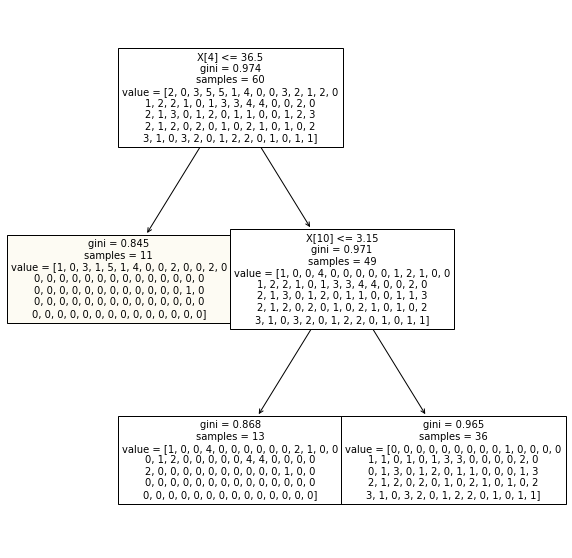

In [331]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(rfc_best.estimators_[2],filled=True)

Conclusion: RandomForest score=0.9973469387755102.It has the highest accuracy.

# Madrid 2014

In [231]:
a=pd.read_csv(r"C:\Users\user\Downloads\C10_air\madrid_2014.csv")
a

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2014-06-01 01:00:00,NaN,0.2,NaN,NaN,3.0,10.0,NaN,NaN,NaN,3.0,NaN,NaN,28079004
1,2014-06-01 01:00:00,0.2,0.2,0.1,0.11,3.0,17.0,68.0,10.0,5.0,5.0,1.36,1.3,28079008
2,2014-06-01 01:00:00,0.3,NaN,0.1,NaN,2.0,6.0,NaN,NaN,NaN,NaN,NaN,1.1,28079011
3,2014-06-01 01:00:00,NaN,0.2,NaN,NaN,1.0,6.0,79.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2014-06-01 01:00:00,NaN,NaN,NaN,NaN,1.0,6.0,75.0,NaN,NaN,4.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210019,2014-09-01 00:00:00,NaN,0.5,NaN,NaN,20.0,84.0,29.0,NaN,NaN,NaN,NaN,NaN,28079056
210020,2014-09-01 00:00:00,NaN,0.3,NaN,NaN,1.0,22.0,NaN,15.0,NaN,6.0,NaN,NaN,28079057
210021,2014-09-01 00:00:00,NaN,NaN,NaN,NaN,1.0,13.0,70.0,NaN,NaN,NaN,NaN,NaN,28079058
210022,2014-09-01 00:00:00,NaN,NaN,NaN,NaN,3.0,38.0,42.0,NaN,NaN,NaN,NaN,NaN,28079059


In [232]:
a=a.head(1000)
a

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2014-06-01 01:00:00,NaN,0.2,NaN,NaN,3.0,10.0,NaN,NaN,NaN,3.0,NaN,NaN,28079004
1,2014-06-01 01:00:00,0.2,0.2,0.1,0.11,3.0,17.0,68.0,10.0,5.0,5.0,1.36,1.3,28079008
2,2014-06-01 01:00:00,0.3,NaN,0.1,NaN,2.0,6.0,NaN,NaN,NaN,NaN,NaN,1.1,28079011
3,2014-06-01 01:00:00,NaN,0.2,NaN,NaN,1.0,6.0,79.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2014-06-01 01:00:00,NaN,NaN,NaN,NaN,1.0,6.0,75.0,NaN,NaN,4.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2014-06-02 18:00:00,NaN,0.2,NaN,NaN,6.0,26.0,125.0,NaN,NaN,NaN,NaN,NaN,28079039
996,2014-06-02 18:00:00,NaN,NaN,NaN,NaN,7.0,36.0,NaN,17.0,NaN,4.0,NaN,NaN,28079040
997,2014-06-02 18:00:00,NaN,NaN,NaN,NaN,2.0,16.0,NaN,14.0,8.0,NaN,NaN,NaN,28079047
998,2014-06-02 18:00:00,NaN,NaN,NaN,NaN,5.0,31.0,NaN,14.0,7.0,NaN,NaN,NaN,28079048


In [233]:
b=a.dropna()
b

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
1,2014-06-01 01:00:00,0.2,0.2,0.1,0.11,3.0,17.0,68.0,10.0,5.0,5.0,1.36,1.3,28079008
6,2014-06-01 01:00:00,0.1,0.2,0.1,0.23,1.0,5.0,80.0,4.0,3.0,2.0,1.21,0.1,28079024
25,2014-06-01 02:00:00,0.2,0.2,0.1,0.11,4.0,21.0,63.0,9.0,6.0,5.0,1.36,0.8,28079008
30,2014-06-01 02:00:00,0.2,0.2,0.1,0.23,1.0,4.0,88.0,7.0,5.0,2.0,1.21,0.1,28079024
49,2014-06-01 03:00:00,0.1,0.2,0.1,0.11,4.0,18.0,66.0,9.0,7.0,6.0,1.36,0.9,28079008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2014-06-02 16:00:00,0.1,0.2,0.1,0.25,2.0,12.0,123.0,10.0,6.0,1.0,1.25,0.2,28079024
961,2014-06-02 17:00:00,0.4,0.4,0.2,0.14,14.0,38.0,104.0,17.0,8.0,6.0,1.39,2.4,28079008
966,2014-06-02 17:00:00,0.1,0.2,0.1,0.26,2.0,15.0,128.0,9.0,6.0,2.0,1.25,0.2,28079024
985,2014-06-02 18:00:00,0.5,0.4,0.3,0.15,16.0,45.0,101.0,24.0,11.0,6.0,1.39,2.4,28079008


In [234]:
b.columns

Index(['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25',
       'SO_2', 'TCH', 'TOL', 'station'],
      dtype='object')

In [236]:
b=b[['BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25',
       'SO_2', 'TCH', 'TOL', 'station']]
b

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
1,0.2,0.2,0.1,0.11,3.0,17.0,68.0,10.0,5.0,5.0,1.36,1.3,28079008
6,0.1,0.2,0.1,0.23,1.0,5.0,80.0,4.0,3.0,2.0,1.21,0.1,28079024
25,0.2,0.2,0.1,0.11,4.0,21.0,63.0,9.0,6.0,5.0,1.36,0.8,28079008
30,0.2,0.2,0.1,0.23,1.0,4.0,88.0,7.0,5.0,2.0,1.21,0.1,28079024
49,0.1,0.2,0.1,0.11,4.0,18.0,66.0,9.0,7.0,6.0,1.36,0.9,28079008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,0.1,0.2,0.1,0.25,2.0,12.0,123.0,10.0,6.0,1.0,1.25,0.2,28079024
961,0.4,0.4,0.2,0.14,14.0,38.0,104.0,17.0,8.0,6.0,1.39,2.4,28079008
966,0.1,0.2,0.1,0.26,2.0,15.0,128.0,9.0,6.0,2.0,1.25,0.2,28079024
985,0.5,0.4,0.3,0.15,16.0,45.0,101.0,24.0,11.0,6.0,1.39,2.4,28079008


In [237]:
x=b.iloc[:,0:10]
y=b.iloc[:,-1]

In [238]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [239]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [241]:
print(lr.score(x_test,y_test))

0.9469362316285637


In [242]:
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [243]:
rr.score(x_test,y_test)

0.9331086026444845

In [244]:
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [245]:
la.score(x_test,y_test)

0.557990925727741

In [246]:
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [247]:
prediction=en.predict(x_test)
print(en.score(x_test,y_test))

0.914707750872671


In [248]:
f=StandardScaler().fit_transform(x)

In [249]:
logr=LogisticRegression()
logr.fit(f,y)

LogisticRegression()

In [250]:
g=[[10,20,30,40,50,60,70,80,90,10]]

In [251]:
prediction=logr.predict(g)
print(prediction)

[28079024]


In [252]:
logr.predict_proba(g)[0][0]

3.3861802251067274e-13

In [253]:
logr.score(x_test,y_test)

0.84

In [254]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [255]:
parameters={'max_depth':[1,2,3,4,5],
           'min_samples_leaf':[5,10,15,20,25],
           'n_estimators':[10,20,30,40,50]
           }

In [256]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [257]:
grid_search.best_score_

1.0

In [258]:
rfc_best=grid_search.best_estimator_

[Text(2232.0, 407.70000000000005, 'X[2] <= 0.25\ngini = 0.5\nsamples = 75\nvalue = [58, 59]'),
 Text(1116.0, 135.89999999999998, 'gini = 0.038\nsamples = 35\nvalue = [1, 50]'),
 Text(3348.0, 135.89999999999998, 'gini = 0.236\nsamples = 40\nvalue = [57, 9]')]

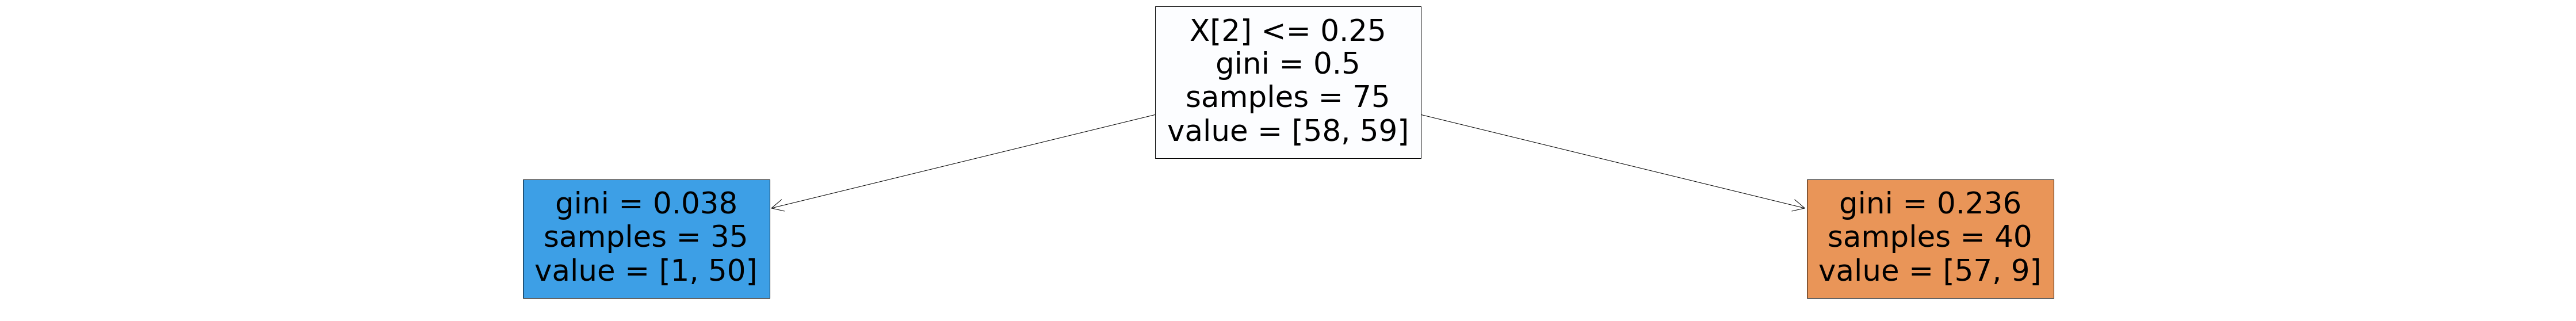

In [294]:
plt.figure(figsize=(80,10))
plot_tree(rfc_best.estimators_[5],filled=True)

Conclusion: RandomForest score=1.0. This has the highest accuracy.

# Madrid 2015

In [260]:
a=pd.read_csv(r"C:\Users\user\Downloads\C10_air\madrid_2015.csv")
a

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2015-10-01 01:00:00,NaN,0.8,NaN,NaN,90.0,82.0,NaN,NaN,NaN,10.0,NaN,NaN,28079004
1,2015-10-01 01:00:00,2.0,0.8,1.6,0.33,40.0,95.0,4.0,37.0,24.0,12.0,1.83,8.3,28079008
2,2015-10-01 01:00:00,3.1,NaN,1.8,NaN,29.0,97.0,NaN,NaN,NaN,NaN,NaN,7.1,28079011
3,2015-10-01 01:00:00,NaN,0.6,NaN,NaN,30.0,103.0,2.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2015-10-01 01:00:00,NaN,NaN,NaN,NaN,95.0,96.0,2.0,NaN,NaN,9.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210091,2015-08-01 00:00:00,NaN,0.2,NaN,NaN,11.0,33.0,53.0,NaN,NaN,NaN,NaN,NaN,28079056
210092,2015-08-01 00:00:00,NaN,0.2,NaN,NaN,1.0,5.0,NaN,26.0,NaN,10.0,NaN,NaN,28079057
210093,2015-08-01 00:00:00,NaN,NaN,NaN,NaN,1.0,7.0,74.0,NaN,NaN,NaN,NaN,NaN,28079058
210094,2015-08-01 00:00:00,NaN,NaN,NaN,NaN,3.0,7.0,65.0,NaN,NaN,NaN,NaN,NaN,28079059


In [261]:
a=a.head(2000)
a

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2015-10-01 01:00:00,NaN,0.8,NaN,NaN,90.0,82.0,NaN,NaN,NaN,10.0,NaN,NaN,28079004
1,2015-10-01 01:00:00,2.0,0.8,1.6,0.33,40.0,95.0,4.0,37.0,24.0,12.0,1.83,8.3,28079008
2,2015-10-01 01:00:00,3.1,NaN,1.8,NaN,29.0,97.0,NaN,NaN,NaN,NaN,NaN,7.1,28079011
3,2015-10-01 01:00:00,NaN,0.6,NaN,NaN,30.0,103.0,2.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2015-10-01 01:00:00,NaN,NaN,NaN,NaN,95.0,96.0,2.0,NaN,NaN,9.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015-10-04 12:00:00,NaN,0.2,NaN,NaN,5.0,34.0,17.0,NaN,NaN,NaN,NaN,NaN,28079016
1996,2015-10-04 12:00:00,NaN,NaN,NaN,NaN,5.0,22.0,44.0,NaN,NaN,7.0,NaN,NaN,28079017
1997,2015-10-04 12:00:00,0.6,0.2,0.2,NaN,7.0,27.0,38.0,37.0,NaN,3.0,NaN,2.2,28079018
1998,2015-10-04 12:00:00,0.4,0.2,0.2,0.10,11.0,22.0,37.0,21.0,12.0,3.0,1.31,2.3,28079024


In [262]:
b=a.dropna()
b

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
1,2015-10-01 01:00:00,2.0,0.8,1.6,0.33,40.0,95.0,4.0,37.0,24.0,12.0,1.83,8.3,28079008
6,2015-10-01 01:00:00,0.5,0.3,0.3,0.12,6.0,83.0,1.0,19.0,12.0,3.0,1.29,4.8,28079024
25,2015-10-01 02:00:00,1.6,0.7,1.3,0.38,81.0,105.0,4.0,36.0,19.0,13.0,1.93,6.9,28079008
30,2015-10-01 02:00:00,0.4,0.3,0.3,0.11,5.0,72.0,2.0,16.0,10.0,2.0,1.27,7.8,28079024
49,2015-10-01 03:00:00,2.2,0.8,1.8,0.41,111.0,104.0,4.0,35.0,20.0,14.0,2.05,13.9,28079008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,2015-10-04 10:00:00,0.3,0.2,0.1,0.08,2.0,20.0,18.0,27.0,17.0,2.0,1.27,2.0,28079024
1969,2015-10-04 11:00:00,0.8,0.3,0.4,0.16,7.0,36.0,9.0,30.0,16.0,11.0,1.95,1.9,28079008
1974,2015-10-04 11:00:00,0.2,0.2,0.1,0.08,7.0,18.0,20.0,20.0,13.0,2.0,1.29,0.9,28079024
1993,2015-10-04 12:00:00,0.6,0.3,0.3,0.14,6.0,30.0,15.0,34.0,20.0,11.0,1.87,1.9,28079008


In [263]:
b.columns

Index(['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25',
       'SO_2', 'TCH', 'TOL', 'station'],
      dtype='object')

In [264]:
b=b[['BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25',
       'SO_2', 'TCH', 'TOL', 'station']]
b

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
1,2.0,0.8,1.6,0.33,40.0,95.0,4.0,37.0,24.0,12.0,1.83,8.3,28079008
6,0.5,0.3,0.3,0.12,6.0,83.0,1.0,19.0,12.0,3.0,1.29,4.8,28079024
25,1.6,0.7,1.3,0.38,81.0,105.0,4.0,36.0,19.0,13.0,1.93,6.9,28079008
30,0.4,0.3,0.3,0.11,5.0,72.0,2.0,16.0,10.0,2.0,1.27,7.8,28079024
49,2.2,0.8,1.8,0.41,111.0,104.0,4.0,35.0,20.0,14.0,2.05,13.9,28079008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,0.3,0.2,0.1,0.08,2.0,20.0,18.0,27.0,17.0,2.0,1.27,2.0,28079024
1969,0.8,0.3,0.4,0.16,7.0,36.0,9.0,30.0,16.0,11.0,1.95,1.9,28079008
1974,0.2,0.2,0.1,0.08,7.0,18.0,20.0,20.0,13.0,2.0,1.29,0.9,28079024
1993,0.6,0.3,0.3,0.14,6.0,30.0,15.0,34.0,20.0,11.0,1.87,1.9,28079008


In [265]:
x=b.iloc[:,0:5]
y=b.iloc[:,-1]

In [266]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [267]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [271]:
print(lr.score(x_test,y_test))

0.5805506124774915


In [272]:
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [273]:
rr.score(x_test,y_test)

0.2985549196223962

In [274]:
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [275]:
la.score(x_test,y_test)

0.007124098913310006

In [276]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [277]:
print(en.coef_)

[-1.02920696 -0.         -0.         -0.         -0.17969594]


In [278]:
print(en.intercept_)

28079019.444565177


In [279]:
prediction=en.predict(x_test)
print(en.score(x_test,y_test))

0.043823979888999665


In [280]:
f=StandardScaler().fit_transform(x)

In [281]:
logr=LogisticRegression()
logr.fit(f,y)

LogisticRegression()

In [282]:
g=[[10,20,30,40,50]]

In [283]:
prediction=logr.predict(g)
print(prediction)

[28079008]


In [284]:
logr.classes_

array([28079008, 28079024], dtype=int64)

In [285]:
logr.predict_proba(g)[0][0]

1.0

In [286]:
logr.score(x_test,y_test)

0.3333333333333333

In [287]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [288]:
parameters={'max_depth':[1,2,3,4,5],
           'min_samples_leaf':[5,10,15,20,25],
           'n_estimators':[10,20,30,40,50]
           }

In [289]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [290]:
grid_search.best_score_

0.9571887784921098

In [291]:
rfc_best=grid_search.best_estimator_

[Text(2232.0, 407.70000000000005, 'X[2] <= 0.25\ngini = 0.5\nsamples = 75\nvalue = [58, 59]'),
 Text(1116.0, 135.89999999999998, 'gini = 0.038\nsamples = 35\nvalue = [1, 50]'),
 Text(3348.0, 135.89999999999998, 'gini = 0.236\nsamples = 40\nvalue = [57, 9]')]

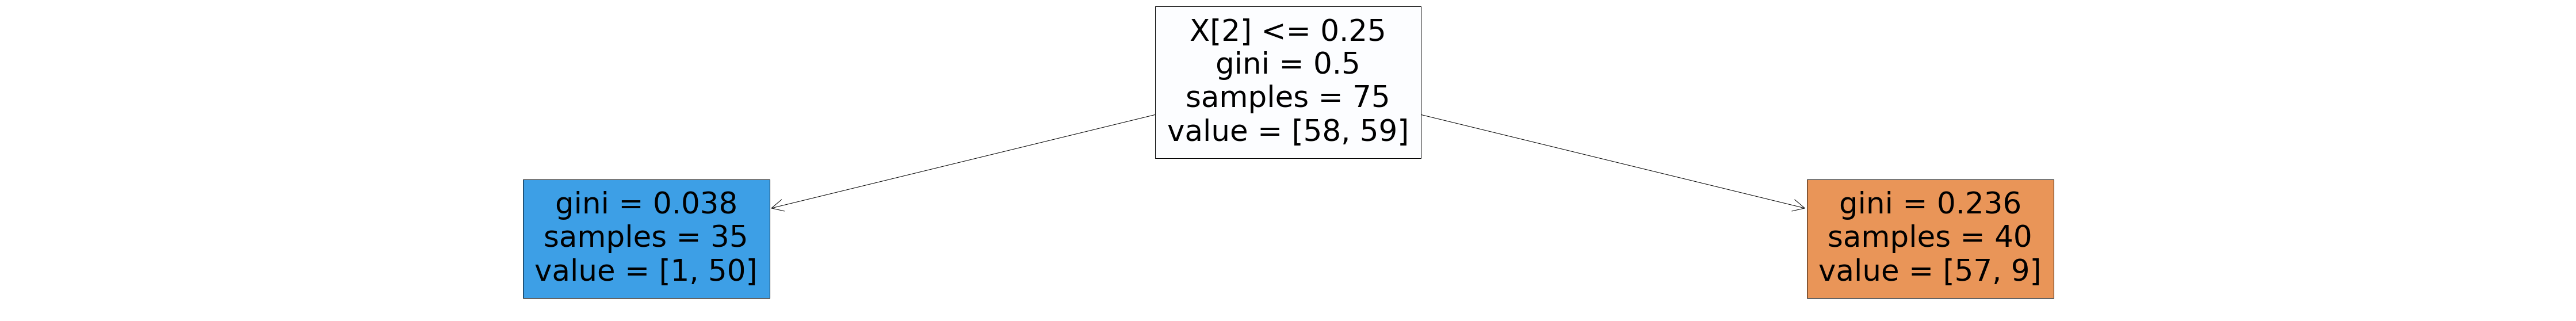

In [293]:
plt.figure(figsize=(80,10))
plot_tree(rfc_best.estimators_[5],filled=True)

Conclusion: RandomForest Score=0.9571887784921098. It has the highest accuracy.

# Madrid 2016

In [295]:
a=pd.read_csv(r"C:\Users\user\Downloads\C10_air\madrid_2016.csv")
a

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2016-11-01 01:00:00,NaN,0.7,NaN,NaN,153.0,77.0,NaN,NaN,NaN,7.0,NaN,NaN,28079004
1,2016-11-01 01:00:00,3.1,1.1,2.0,0.53,260.0,144.0,4.0,46.0,24.0,18.0,2.44,14.4,28079008
2,2016-11-01 01:00:00,5.9,NaN,7.5,NaN,297.0,139.0,NaN,NaN,NaN,NaN,NaN,26.0,28079011
3,2016-11-01 01:00:00,NaN,1.0,NaN,NaN,154.0,113.0,2.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2016-11-01 01:00:00,NaN,NaN,NaN,NaN,275.0,127.0,2.0,NaN,NaN,18.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209491,2016-07-01 00:00:00,NaN,0.2,NaN,NaN,2.0,29.0,73.0,NaN,NaN,NaN,NaN,NaN,28079056
209492,2016-07-01 00:00:00,NaN,0.3,NaN,NaN,1.0,29.0,NaN,36.0,NaN,5.0,NaN,NaN,28079057
209493,2016-07-01 00:00:00,NaN,NaN,NaN,NaN,1.0,19.0,71.0,NaN,NaN,NaN,NaN,NaN,28079058
209494,2016-07-01 00:00:00,NaN,NaN,NaN,NaN,6.0,17.0,85.0,NaN,NaN,NaN,NaN,NaN,28079059


In [296]:
a=a.head(2000)
a

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2016-11-01 01:00:00,NaN,0.7,NaN,NaN,153.0,77.0,NaN,NaN,NaN,7.0,NaN,NaN,28079004
1,2016-11-01 01:00:00,3.1,1.1,2.0,0.53,260.0,144.0,4.0,46.0,24.0,18.0,2.44,14.4,28079008
2,2016-11-01 01:00:00,5.9,NaN,7.5,NaN,297.0,139.0,NaN,NaN,NaN,NaN,NaN,26.0,28079011
3,2016-11-01 01:00:00,NaN,1.0,NaN,NaN,154.0,113.0,2.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2016-11-01 01:00:00,NaN,NaN,NaN,NaN,275.0,127.0,2.0,NaN,NaN,18.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2016-11-04 12:00:00,NaN,0.4,NaN,NaN,35.0,61.0,7.0,NaN,NaN,NaN,NaN,NaN,28079016
1996,2016-11-04 12:00:00,NaN,NaN,NaN,NaN,51.0,57.0,6.0,NaN,NaN,11.0,NaN,NaN,28079017
1997,2016-11-04 12:00:00,0.6,0.5,0.4,NaN,82.0,77.0,2.0,27.0,NaN,8.0,NaN,4.1,28079018
1998,2016-11-04 12:00:00,0.8,0.5,0.7,0.09,75.0,57.0,5.0,36.0,25.0,4.0,1.50,5.9,28079024


In [297]:
b=a.dropna()
b

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
1,2016-11-01 01:00:00,3.1,1.1,2.0,0.53,260.0,144.0,4.0,46.0,24.0,18.0,2.44,14.4,28079008
6,2016-11-01 01:00:00,0.7,0.8,0.4,0.13,57.0,66.0,3.0,23.0,15.0,4.0,1.35,5.0,28079024
25,2016-11-01 02:00:00,2.7,1.0,2.1,0.40,139.0,114.0,4.0,37.0,21.0,14.0,2.30,15.0,28079008
30,2016-11-01 02:00:00,0.7,0.7,0.4,0.13,48.0,59.0,3.0,23.0,15.0,3.0,1.35,5.0,28079024
49,2016-11-01 03:00:00,1.7,0.8,1.4,0.25,53.0,90.0,4.0,31.0,19.0,10.0,1.95,10.7,28079008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,2016-11-04 10:00:00,0.6,0.7,0.3,0.09,78.0,55.0,4.0,25.0,16.0,4.0,1.53,3.4,28079024
1969,2016-11-04 11:00:00,1.2,0.5,0.7,0.18,97.0,82.0,7.0,23.0,14.0,10.0,1.98,5.3,28079008
1974,2016-11-04 11:00:00,0.9,0.7,0.7,0.11,93.0,64.0,4.0,31.0,20.0,4.0,1.57,7.2,28079024
1993,2016-11-04 12:00:00,0.9,0.5,0.5,0.15,60.0,68.0,10.0,20.0,11.0,8.0,2.26,4.6,28079008


In [298]:
b.columns

Index(['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25',
       'SO_2', 'TCH', 'TOL', 'station'],
      dtype='object')

In [299]:
c=b[['BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25',
       'SO_2', 'TCH', 'TOL']]
d=b['station']

In [300]:
x=c.iloc[:,0:11]
y=c.iloc[:,-1]

In [301]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [302]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [303]:
print(lr.score(x_test,y_test))

0.9690470932914338


In [304]:
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [305]:
rr.score(x_test,y_test)

0.9418109237865376

In [306]:
la=Lasso()
la.fit(x_train,y_train)

Lasso()

In [307]:
la.score(x_test,y_test)

0.7835399942759345

In [308]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [309]:
prediction=en.predict(x_test)
print(en.score(x_test,y_test))

0.7863899087216121


In [310]:
x1=c.drop('NO',axis=1)
y1=c['NO']

In [311]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.4,random_state=40)

In [312]:
f=StandardScaler().fit_transform(x1)

In [316]:
logr=LogisticRegression(max_iter=10000)
logr.fit(x1,y1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

In [317]:
g=[[10,20,30,40,50,60,70,80,90,100,110]]

In [318]:
prediction=logr.predict(g)
print(prediction)

[67.]


In [319]:
logr.predict_proba(g)[0][0]

1.8160641379890461e-155

In [320]:
logr.score(x1_test,y1_test)

0.5909090909090909

In [321]:
rfc=RandomForestClassifier()
rfc.fit(x1_train,y1_train)

RandomForestClassifier()

In [322]:
parameters={'max_depth':[1,2,3,4,5,6],
           'min_samples_leaf':[5,10,15,20,25],
           'n_estimators':[10,20,30,40,50]
           }

In [323]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x1_train,y1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [324]:
grid_search.best_score_

0.07061224489795918

In [325]:
rfc_best=grid_search.best_estimator_

[Text(1785.6, 1812.0, 'X[10] <= 2.05\ngini = 0.969\nsamples = 64\nvalue = [6, 1, 1, 3, 1, 2, 4, 2, 2, 8, 3, 2, 3, 1\n3, 1, 0, 1, 0, 2, 1, 1, 0, 2, 5, 1, 1, 0\n1, 1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 4, 5\n1, 1, 0, 2, 1, 0, 3, 0, 0, 2, 2, 0, 0, 0\n0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0]'),
 Text(892.8, 1087.2, 'gini = 0.846\nsamples = 15\nvalue = [6, 0, 1, 2, 1, 1, 0, 1, 0, 7, 1, 1, 2, 0\n2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(2678.3999999999996, 1087.2, 'X[8] <= 3.5\ngini = 0.969\nsamples = 49\nvalue = [0, 1, 0, 1, 0, 1, 4, 1, 2, 1, 2, 1, 1, 1\n1, 0, 0, 1, 0, 2, 1, 1, 0, 2, 5, 1, 1, 0\n1, 1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 4, 5\n1, 1, 0, 2, 1, 0, 3, 0, 0, 2, 2, 0, 0, 0\n0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0]'),
 Text(1785.6, 362.39999999999986, 'gini = 0.875\nsamples = 14\nvalue = [0, 1, 0, 1, 0, 1, 4, 1, 2, 0, 0, 1, 1, 1\n1, 0, 0, 0, 0, 0, 0, 0, 0, 0

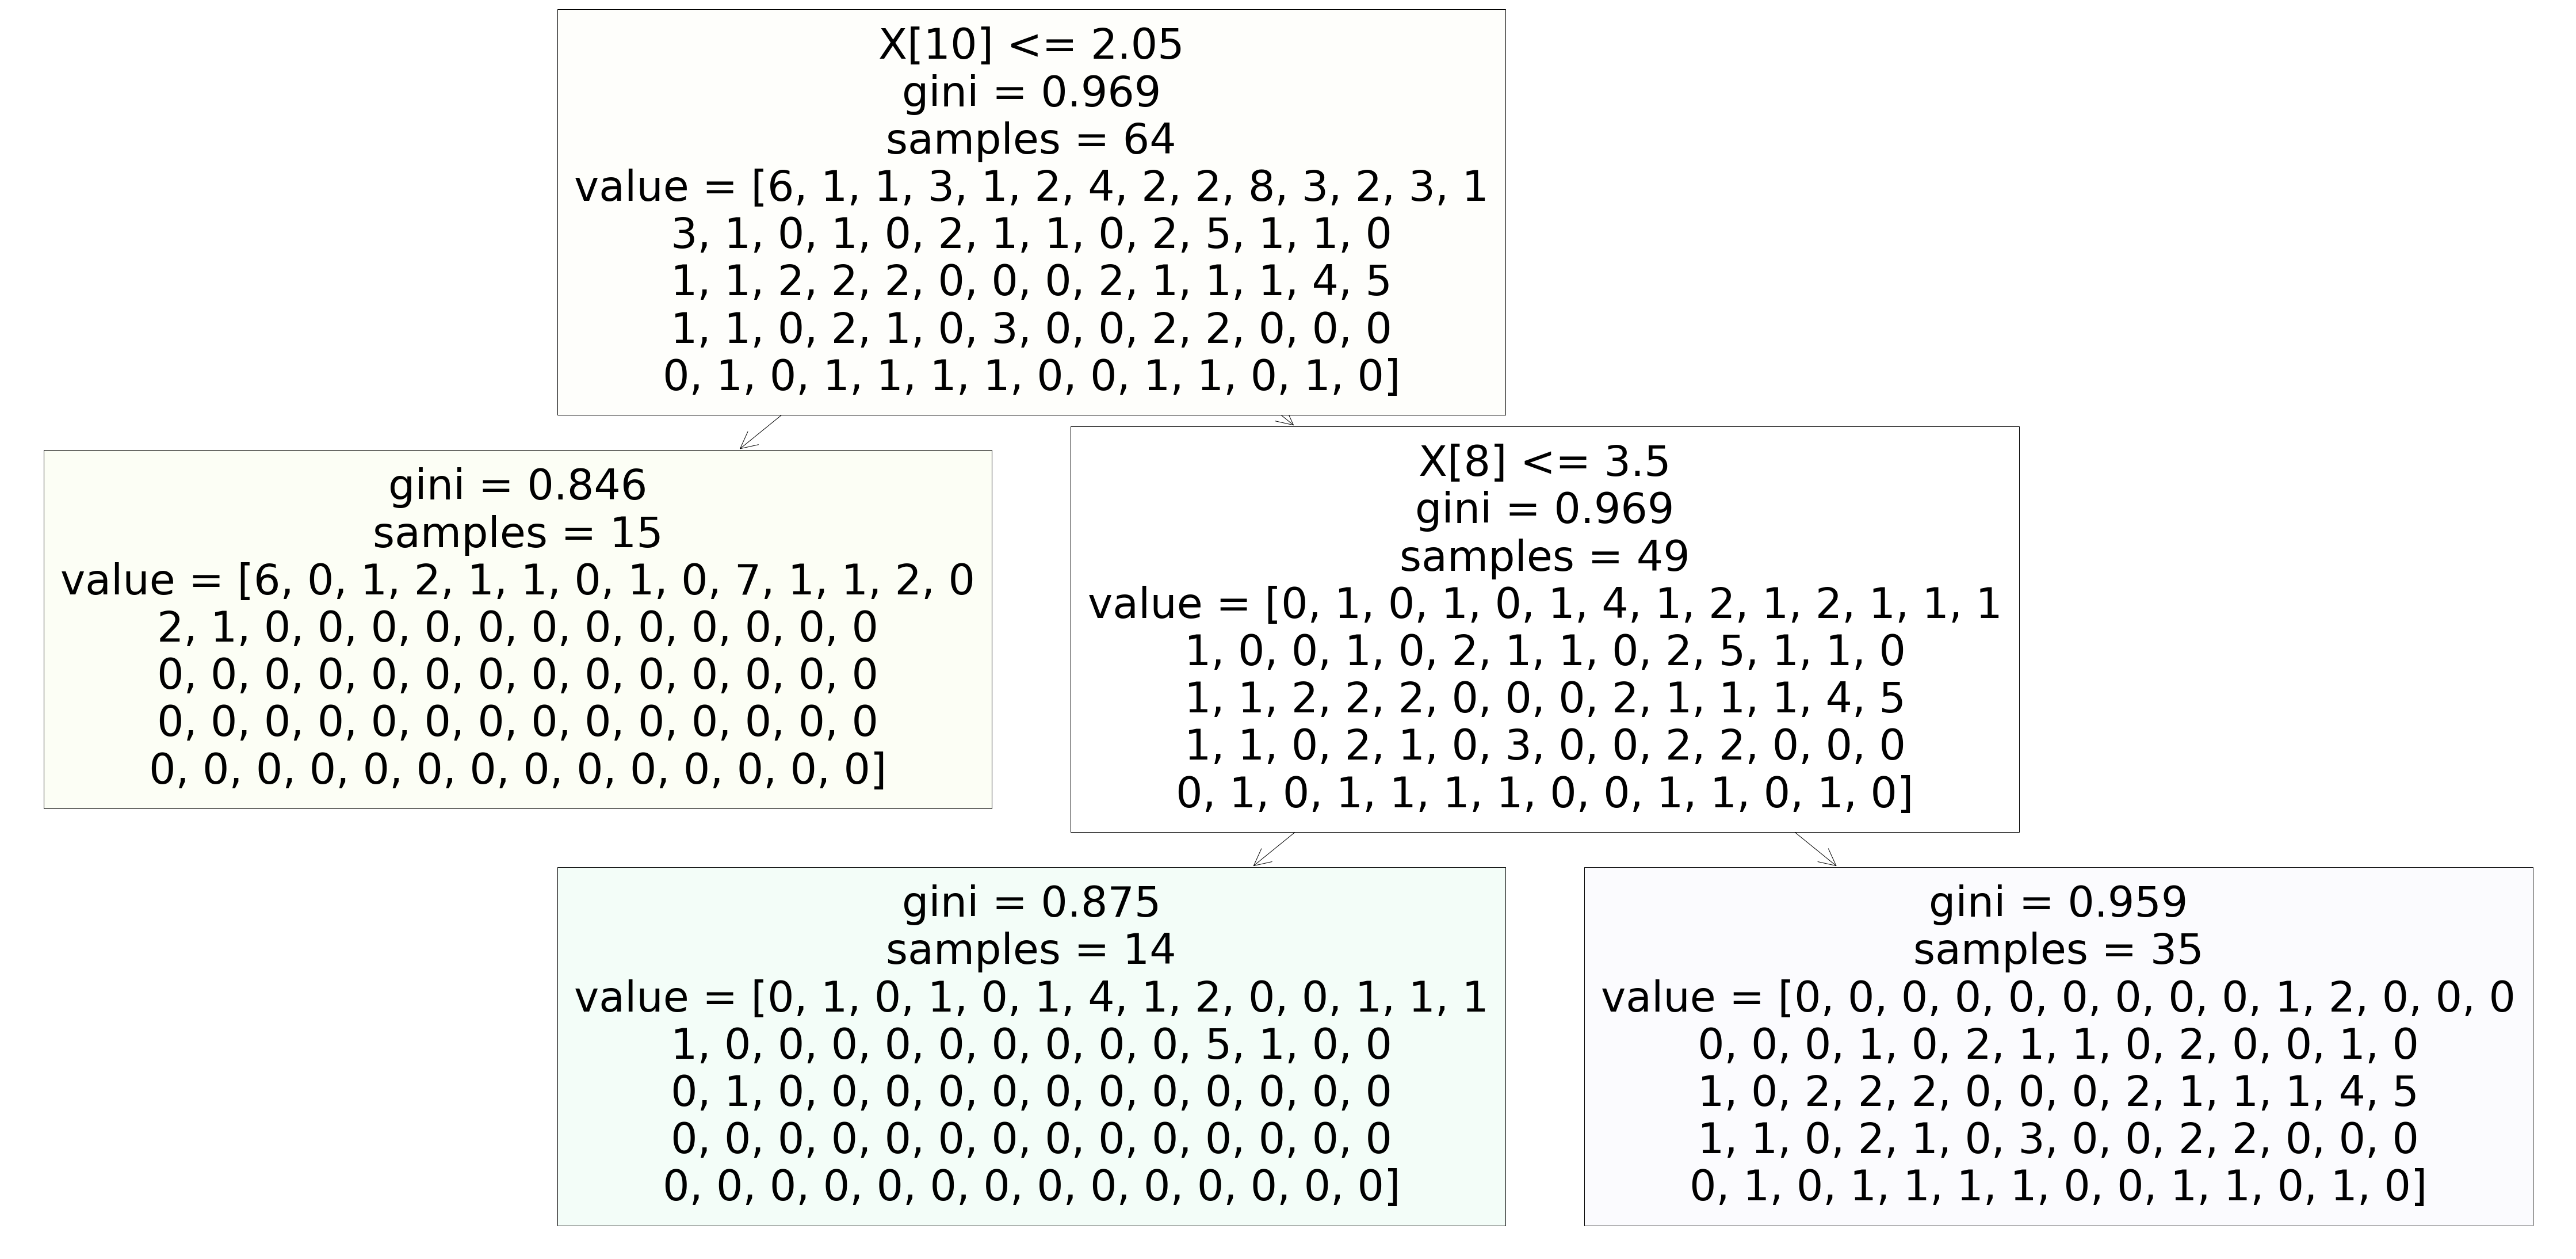

In [327]:
plt.figure(figsize=(80,40))
plot_tree(rfc_best.estimators_[5],filled=True)

Conclusion: Linear Score=0.9690470932914338. It has the highest accuracy.